In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from keras.utils import np_utils

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print(y_train)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
[9 0 0 ... 3 0 5]


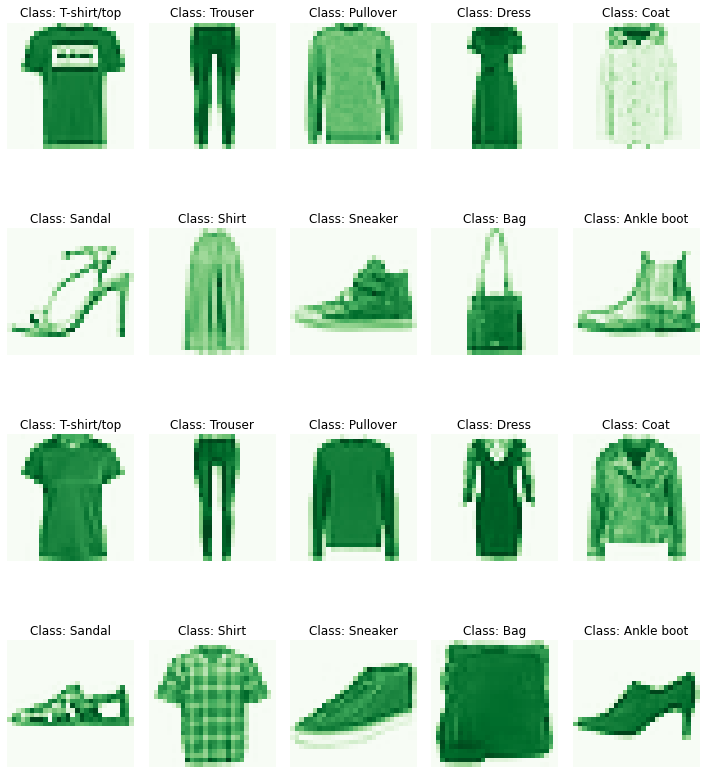

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig = plt.figure(figsize=(10,12))

for i in range(20):
    plt.subplot(4,5,i+1)
    img = X_train[y_train == (i%10)][i%10+i]
    plt.imshow(img, cmap='Greens', interpolation='none')
    plt.title("Class: {}".format(class_names[i%10]))
    plt.axis('off')
    
plt.tight_layout()

In [5]:
from sklearn.preprocessing import StandardScaler

#Preparing the Data
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = np.insert(X_train, X_train.shape[1], 1, axis=1)
X_test = np.insert(X_test, X_test.shape[1], 1, axis=1)

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)


scaler= StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test /= 255

Training matrix shape (60000, 785)
Testing matrix shape (10000, 785)


In [6]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices using one-hot encoding
num_classes = 10 # There are 10 classes possible 
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [7]:
from random import seed
from random import random
from numpy import random
 
# Initialize a network
def initialize_network(n_inputs, n_hidden, n_outputs, n_layers):
    network = list()
    for i in range(n_layers):
        if i==0:
            hidden_layer = [{'weights':[random.rand()*0.01 for i in range(n_inputs + 1)]} for i in range(n_hidden)]
        else:
            hidden_layer = [{'weights':[random.rand()*0.01 for i in range(n_hidden + 1)]} for i in range(n_hidden)]
        network.append(hidden_layer)
    output_layer = [{'weights':[random.rand()*0.01 for i in range(n_hidden+1)]} for i in range(n_outputs)]
    network.append(output_layer)
    return network
 
seed(1)
no_of_inputs=784
no_of_neurons_in_hidden_layer=5
no_of_classes=10
no_of_layers=1
network = initialize_network(no_of_inputs, no_of_neurons_in_hidden_layer, no_of_classes, no_of_layers)
for layer in network:
    print(layer)
    print("\n")

[{'weights': [0.002336229733381513, 0.004443442061199069, 0.004261632921334467, 0.004407966959604282, 0.006281674349290792, 0.0021019721541969297, 0.009568628258315769, 0.008798354112900015, 0.007933735510466788, 0.00021886689736372867, 0.009695430641032772, 0.0035319440519943667, 0.0019325383857374922, 0.0023024641721043427, 0.00555684922367774, 0.009018386023785472, 0.008733566113979298, 0.00770800788805997, 0.004748368471160901, 0.006975768711359743, 0.000402967274370456, 0.006696959884769744, 0.008285681367936209, 0.005198202399349948, 0.009714975105358951, 0.004569252987855912, 0.0070725642598522325, 0.0087957398759603, 0.009037433505486416, 0.00704836766791694, 0.007663093620995775, 0.004290371407446039, 0.004804393500425648, 0.0025839211151842466, 0.0025621670409374077, 0.0028745093597292637, 0.00363710499484614, 0.004917926268869301, 0.005087972502792144, 5.711259916297839e-06, 0.004344125243632147, 0.0023686730183090877, 0.0013711192246634418, 0.003938777179876665, 0.000966002

In [8]:
from math import exp

# Calculate neuron activation for an input
def activate(weights, inputs,enni):
    bias = weights[-1]
    activation=np.dot(inputs, weights)
    activation+=bias
    return activation
 
# Transfer neuron activation
def transfer(activation):
    return 1.0 / (1.0 + exp(-activation))

# Softmax function
def softmax(x):
    mx=np.max(x)
    x=x-mx
    return np.exp(x)/np.sum(np.exp(x))
 
# Forward propagate input to a network output
def forward_propagate(network, row):
    inputs = row
    j=0
    for layer in network:
        new_inputs = []
        for neuron in layer:
            activation = activate(neuron['weights'], inputs,j)
            if j!=no_of_layers:
                neuron['output'] = transfer(activation)
                new_inputs.append(neuron['output'])
            else:
                new_inputs.append(activation)
#         new_inputs.append(1)
#         j+=1
        
        if j==no_of_layers:
            neuron['output'] = softmax(new_inputs)
            new_inputs=[]
            new_inputs.append(neuron['output'])
        else:
            new_inputs.append(1)
            j+=1
        
        print(new_inputs)
        print("\n")
        inputs=new_inputs
    return inputs
 
output=[]
for i in range(100):
    output=forward_propagate(network,X_train[i])
    max_val,ind=-1,-1
    for i in range(len(output[0])):
        if output[0][i]>max_val:
            max_val=output[0][i]
            ind=i
#     print(ind,output)
    print("\n")

[0.7753153885023297, 0.8117251879988259, 0.8215446588665362, 0.8158143495555703, 0.7911673378114981, 1]


[array([0.10005237, 0.09861492, 0.10006464, 0.10110869, 0.10000718,
       0.09958497, 0.10018359, 0.0997215 , 0.10000112, 0.10066103])]




[0.8526282728300476, 0.8347149712133475, 0.8268586716595935, 0.8272829377069102, 0.8328727428017195, 1]


[array([0.10007232, 0.09860658, 0.10004536, 0.10110552, 0.10003932,
       0.09959344, 0.10015099, 0.09967198, 0.10000259, 0.10071191])]




[0.14413819324515761, 0.12381009440929391, 0.136220499627746, 0.1314713427144142, 0.14347245538769246, 1]


[array([0.10015738, 0.09891129, 0.1002032 , 0.10071972, 0.09983369,
       0.09909291, 0.10052697, 0.10036542, 0.10042514, 0.09976427])]




[0.3279924664424727, 0.2948420684998448, 0.3294282476765436, 0.3083914184382068, 0.3248462641305601, 1]


[array([0.10012998, 0.09883164, 0.10016535, 0.10082343, 0.09989743,
       0.09922152, 0.10042906, 0.10017924, 0.1003189 , 0.10000345])]




[0.5369295